<a href="https://colab.research.google.com/github/COMS-BC3159-F24/colabs/blob/main/MatrixAverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix Average
We've provided a sample matrix $A$ as shown in lecture.  Run the two cells below to compute its average.

In [1]:
A = [[0,  1,  2,  3],
     [4,  5,  6,  7],
     [8,  9,  10, 11],
     [12, 13, 14, 15]]

def printMatrix(matrix):
    for row in matrix:
        print(' '.join(f'{elem:5}' for elem in row))

In [2]:
def averageMatrix(matrix):
    average = 0
    sum = 0
    count = 0
    for row in matrix:
        for elem in row:
            sum += elem
            count += 1
    average = sum / count
    print(f"Average of matrix of size {len(matrix[0])}: {average}")

averageMatrix(A)

Average of matrix of size 4: 7.5


---
## Benchmark
With this naïve implementation that leverages only vanilla Python (i.e., no third party libraries like Numpy, etc.), let's get a rough benchmark of how long it takes to average various sizes of square matrices.

Average of matrix of size 2: 1494.25
    Compute time of: 2.24E-04
Average of matrix of size 4: 2829.1875
    Compute time of: 2.17E-05
Average of matrix of size 8: 2661.0
    Compute time of: 3.19E-05
Average of matrix of size 16: 2777.63671875
    Compute time of: 3.70E-05
Average of matrix of size 32: 2522.07421875
    Compute time of: 1.07E-04
Average of matrix of size 64: 2470.932373046875
    Compute time of: 3.64E-04
Average of matrix of size 128: 2493.5712280273438
    Compute time of: 1.44E-03
Average of matrix of size 256: 2497.1226501464844
    Compute time of: 5.30E-03
Average of matrix of size 512: 2502.1524085998535
    Compute time of: 2.15E-02
Average of matrix of size 1024: 2499.4511251449585
    Compute time of: 1.94E-01
Average of matrix of size 2048: 2499.181416988373
    Compute time of: 1.38E+00
Average of matrix of size 4096: 2500.084789931774
    Compute time of: 1.49E+00
Average of matrix of size 8192: 2499.96123573184
    Compute time of: 6.72E+00


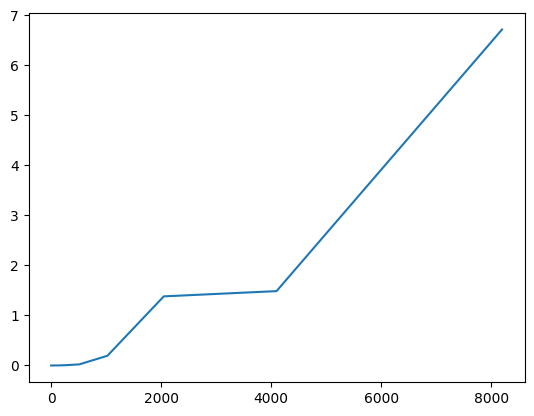

In [3]:
import time
import matplotlib.pyplot as plt

def randSquareMatrix(size_n):
    from random import randint
    return [[randint(0, 5000) for _ in range(size_n)] for _ in range(size_n)]

sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
durations = []
for size in sizes:
    matrix = randSquareMatrix(size)
    start = time.time()
    averageMatrix(matrix)
    end = time.time()
    durations.append(end - start)
    print(f"    Compute time of: {durations[-1]:.2E}")

plt.plot(sizes, durations)

**What did you notice about the averages? What about the times? Anything surprise you?**

---
## Parallel

Now lets try it in parallel with the ```cupy``` library! Make sure you have selected a GPU runtime! Now run the code block below. **How do the resuts compare? Is it what you expect?**

Average of matrix of size 2: 3120.0
    Compute time of: 1.93E-03
Average of matrix of size 4: 2851.9375
    Compute time of: 3.51E-04
Average of matrix of size 8: 2521.234375
    Compute time of: 3.13E-04
Average of matrix of size 16: 2615.01953125
    Compute time of: 5.53E-04
Average of matrix of size 32: 2386.33984375
    Compute time of: 2.73E-04
Average of matrix of size 64: 2488.943603515625
    Compute time of: 1.17E-03
Average of matrix of size 128: 2507.1406860351562
    Compute time of: 1.09E-03
Average of matrix of size 256: 2492.118133544922
    Compute time of: 3.70E-03
Average of matrix of size 512: 2498.406017303467
    Compute time of: 4.02E-02
Average of matrix of size 1024: 2502.4690437316895
    Compute time of: 4.91E-02
Average of matrix of size 2048: 2499.7511422634125
    Compute time of: 1.97E-01
Average of matrix of size 4096: 2500.1687037944794
    Compute time of: 9.92E-01
Average of matrix of size 8192: 2499.8296815752983
    Compute time of: 3.65E+00


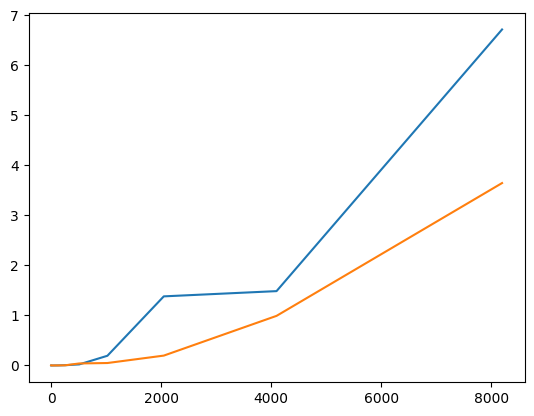

In [5]:
import cupy as cp

parallel_durations = []
for size in sizes:
    matrix = randSquareMatrix(size)
    start = time.time()
    average = cp.average(matrix)
    end = time.time()
    parallel_durations.append(end - start)
    print(f"Average of matrix of size {size}: {average}")
    print(f"    Compute time of: {parallel_durations[-1]:.2E}")

plt.plot(sizes, durations, label = "Serial")
plt.plot(sizes, parallel_durations, label = "Parallel")
plt.legend()
plt.show()